In [37]:
import pandas as pd 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas_profiling
import missingno as msno
from IPython.display import Markdown

In [2]:
df = pd.read_csv('appstore_games.csv')
df.head()

URL         ID  \
0   https://apps.apple.com/us/app/sudoku/id284921427  284921427   
1  https://apps.apple.com/us/app/reversi/id284926400  284926400   
2  https://apps.apple.com/us/app/morocco/id284946595  284946595   
3  https://apps.apple.com/us/app/sudoku-free/id28...  285755462   
4  https://apps.apple.com/us/app/senet-deluxe/id2...  285831220   

            Name Subtitle                                           Icon URL  \
0         Sudoku      NaN  https://is2-ssl.mzstatic.com/image/thumb/Purpl...   
1        Reversi      NaN  https://is4-ssl.mzstatic.com/image/thumb/Purpl...   
2        Morocco      NaN  https://is5-ssl.mzstatic.com/image/thumb/Purpl...   
3  Sudoku (Free)      NaN  https://is3-ssl.mzstatic.com/image/thumb/Purpl...   
4   Senet Deluxe      NaN  https://is1-ssl.mzstatic.com/image/thumb/Purpl...   

   Average User Rating  User Rating Count  Price In-app Purchases  \
0                  4.0             3553.0   2.99              NaN   
1                  3.5              284.0   1.99              NaN   
2                  3.0             8376.0   0.00              NaN   
3                  3.5           190394.0   0.00              NaN   
4                  3.5               28.0   2.99              NaN   

                                         Description  \
0  Join over 21,000,000 of our fans and download ...   
1  The classic game of Reversi, also known as Oth...   
2  Play the classic strategy game Othello (also k...   
3  Top 100 free app for over a year.\nRated "Best...   
4  "Senet Deluxe - The Ancient Game of Life and A...   

                  Developer Age Rating  \
0  Mighty Mighty Good Games         4+   
1          Kiss The Machine         4+   
2               Bayou Games         4+   
3  Mighty Mighty Good Games         4+   
4           RoGame Software         4+   

                                           Languages        Size  \
0  DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...  15853568.0   
1                                                 EN  12328960.0   
2                                                 EN    674816.0   
3  DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...  21552128.0   
4  DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...  34689024.0   

  Primary Genre                             Genres Original Release Date  \
0         Games            Games, Strategy, Puzzle            11/07/2008   
1         Games             Games, Strategy, Board            11/07/2008   
2         Games             Games, Board, Strategy            11/07/2008   
3         Games            Games, Strategy, Puzzle            23/07/2008   
4         Games  Games, Strategy, Board, Education            18/07/2008   

  Current Version Release Date  
0                   30/05/2017  
1                   17/05/2018  
2                    5/09/2017  
3                   30/05/2017  
4                   22/07/2018

In [3]:
print("Percentage null or na values in df")
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

Percentage null or na values in df


URL                              0.00
ID                               0.00
Name                             0.00
Subtitle                        69.07
Icon URL                         0.00
Average User Rating             55.54
User Rating Count               55.54
Price                            0.14
In-app Purchases                54.82
Description                      0.00
Developer                        0.00
Age Rating                       0.00
Languages                        0.35
Size                             0.01
Primary Genre                    0.00
Genres                           0.00
Original Release Date            0.00
Current Version Release Date     0.00
dtype: float64

In [4]:
df.describe()

ID  Average User Rating  User Rating Count         Price  \
count  1.700700e+04          7561.000000       7.561000e+03  16983.000000   
mean   1.059614e+09             4.060905       3.306531e+03      0.813419   
std    2.999676e+08             0.751428       4.232256e+04      7.835732   
min    2.849214e+08             1.000000       5.000000e+00      0.000000   
25%    8.996543e+08             3.500000       1.200000e+01      0.000000   
50%    1.112286e+09             4.500000       4.600000e+01      0.000000   
75%    1.286983e+09             4.500000       3.090000e+02      0.000000   
max    1.475077e+09             5.000000       3.032734e+06    179.990000   

               Size  
count  1.700600e+04  
mean   1.157064e+08  
std    2.036477e+08  
min    5.132800e+04  
25%    2.295014e+07  
50%    5.676895e+07  
75%    1.330271e+08  
max    4.005591e+09

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
URL                             17007 non-null object
ID                              17007 non-null int64
Name                            17007 non-null object
Subtitle                        5261 non-null object
Icon URL                        17007 non-null object
Average User Rating             7561 non-null float64
User Rating Count               7561 non-null float64
Price                           16983 non-null float64
In-app Purchases                7683 non-null object
Description                     17007 non-null object
Developer                       17007 non-null object
Age Rating                      17007 non-null object
Languages                       16947 non-null object
Size                            17006 non-null float64
Primary Genre                   17007 non-null object
Genres                          17007 non-null object
Original Release Date       

In [6]:
#Using pandas profiling tool for a starting EDA
pandas_profiling.ProfileReport(df)

In [7]:
df.shape

(17007, 18)

In [8]:
df.drop(['URL', 'ID'], axis = 1, inplace = True)

In [9]:
df.head()

Name Subtitle                                           Icon_URL  \
0         Sudoku      NaN  https://is2-ssl.mzstatic.com/image/thumb/Purpl...   
1        Reversi      NaN  https://is4-ssl.mzstatic.com/image/thumb/Purpl...   
2        Morocco      NaN  https://is5-ssl.mzstatic.com/image/thumb/Purpl...   
3  Sudoku (Free)      NaN  https://is3-ssl.mzstatic.com/image/thumb/Purpl...   
4   Senet Deluxe      NaN  https://is1-ssl.mzstatic.com/image/thumb/Purpl...   

   Average_User_Rating  User_Rating_Count  Price In-app_Purchases  \
0                  4.0             3553.0   2.99              NaN   
1                  3.5              284.0   1.99              NaN   
2                  3.0             8376.0   0.00              NaN   
3                  3.5           190394.0   0.00              NaN   
4                  3.5               28.0   2.99              NaN   

                                         Description  \
0  Join over 21,000,000 of our fans and download ...   
1  The classic game of Reversi, also known as Oth...   
2  Play the classic strategy game Othello (also k...   
3  Top 100 free app for over a year.\nRated "Best...   
4  "Senet Deluxe - The Ancient Game of Life and A...   

                  Developer Age_Rating  \
0  Mighty Mighty Good Games         4+   
1          Kiss The Machine         4+   
2               Bayou Games         4+   
3  Mighty Mighty Good Games         4+   
4           RoGame Software         4+   

                                           Languages        Size  \
0  DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...  15853568.0   
1                                                 EN  12328960.0   
2                                                 EN    674816.0   
3  DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...  21552128.0   
4  DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...  34689024.0   

  Primary_Genre                             Genres Original_Release_Date  \
0         Games            Games, Strategy, Puzzle            11/07/2008   
1         Games             Games, Strategy, Board            11/07/2008   
2         Games             Games, Board, Strategy            11/07/2008   
3         Games            Games, Strategy, Puzzle            23/07/2008   
4         Games  Games, Strategy, Board, Education            18/07/2008   

  Current_Version_Release_Date  
0                   30/05/2017  
1                   17/05/2018  
2                    5/09/2017  
3                   30/05/2017  
4                   22/07/2018

**Visualization of missing variable**

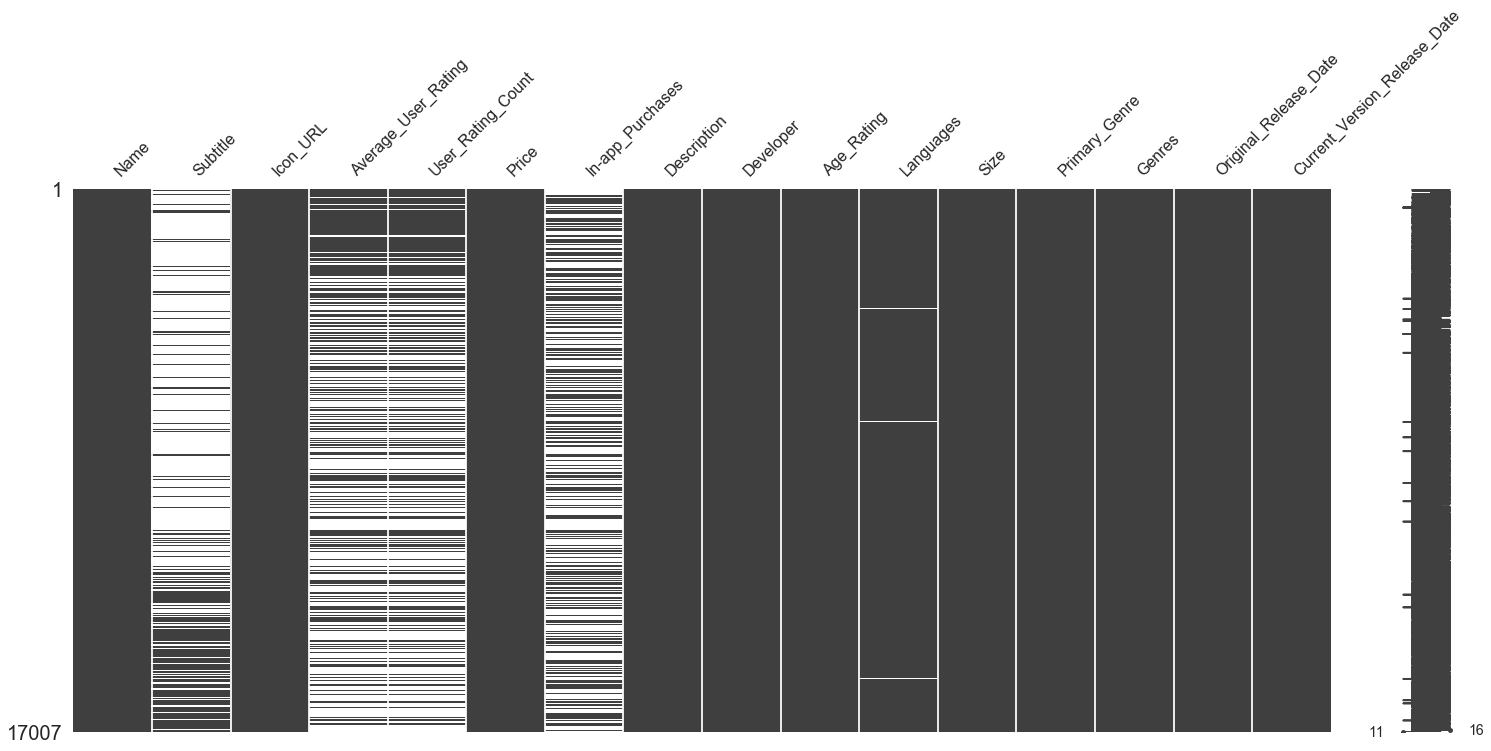

In [10]:
display(Markdown("**Visualization of missing variable**"))
msno.matrix(df)
plt.show()

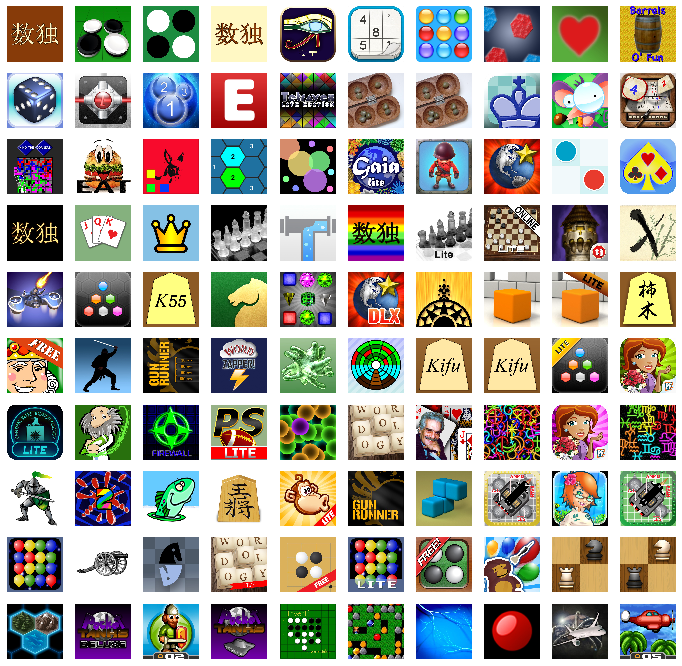

Wall time: 23.9 s


In [11]:
%%time
import requests
from PIL import Image
from io import BytesIO

fig, ax = plt.subplots(10,10, figsize=(12,12))

for i in range(100):
    r = requests.get(df['Icon_URL'][i])
    im = Image.open(BytesIO(r.content))
    ax[i//10][i%10].imshow(im)
    ax[i//10][i%10].axis('off')
plt.show()

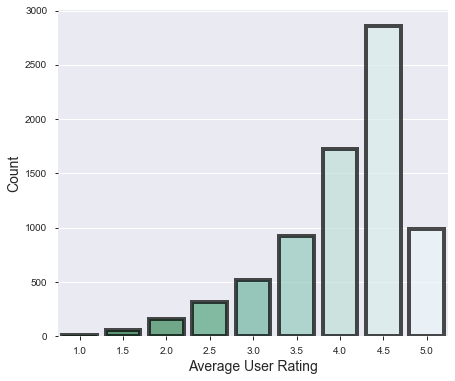

In [12]:
plt.rcParams['figure.figsize'] = (7, 6)
ax = sns.countplot(data = df, x ='Average_User_Rating', palette = 'BuGn_r', alpha = 0.7, linewidth=4, edgecolor= 'black')
ax.set_ylabel('Count', fontsize = 14)
ax.set_xlabel('Average User Rating', fontsize = 14)
plt.show()

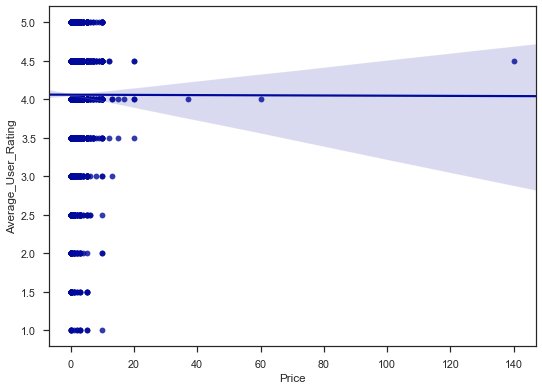

In [72]:
fig, ax = plt.subplots(1,1, figsize=(8, 6), dpi=70)
sns.regplot(data=df, x='Price', y='Average_User_Rating', ax=ax, color = '#000999')
plt.show()

In [25]:
df['GenreList'] = df['Genres'].apply(lambda s : s.replace('Games','').replace('&',' ').replace(',', ' ').split()) 
df['GenreList'].head()

0              [Strategy, Puzzle]
1               [Strategy, Board]
2               [Board, Strategy]
3              [Strategy, Puzzle]
4    [Strategy, Board, Education]
Name: GenreList, dtype: object

In [26]:
gameTypes = []
for i in df['GenreList']: 
    gameTypes += i
gameTypes = set(gameTypes)
print("There are {} types in the Game Dataset".format(len(set(gameTypes))))

There are 56 types in the Game Dataset


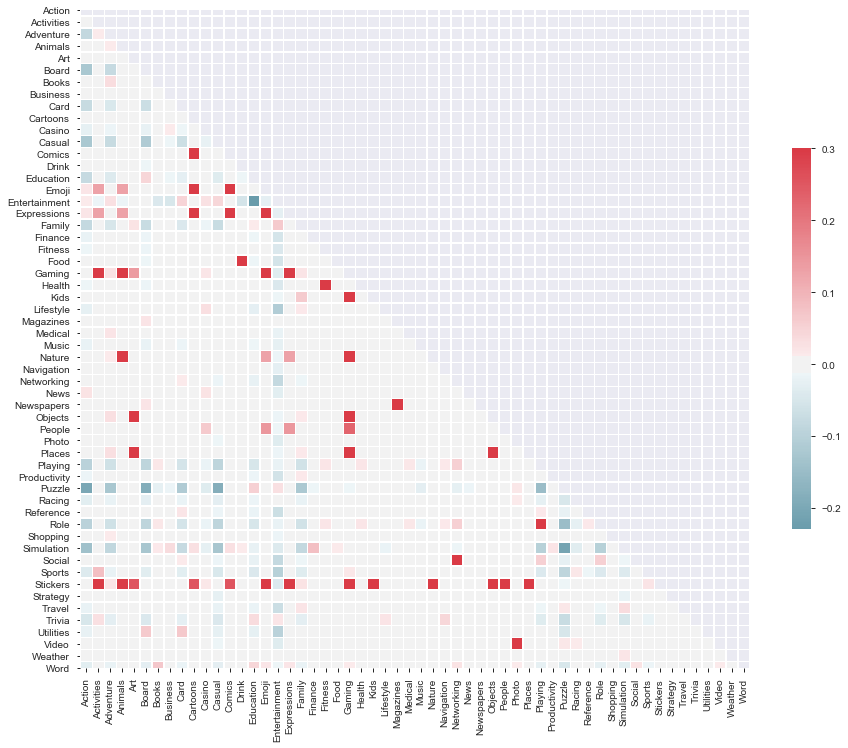

In [29]:
from sklearn.preprocessing import MultiLabelBinarizer 

test = df['GenreList']
mlb = MultiLabelBinarizer()
res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)

corr = res.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 14))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

C:\Users\anuja\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\anuja\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\anuja\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):


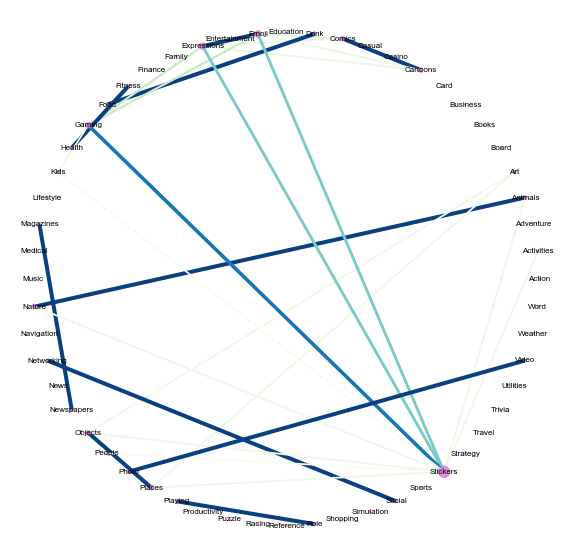

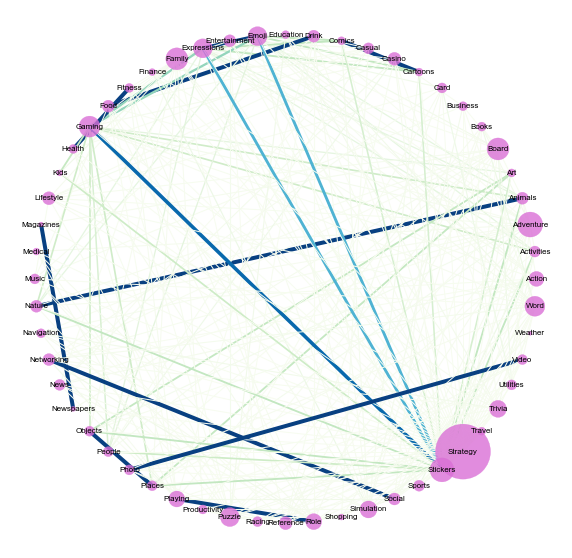

In [30]:
import networkx as nx

stocks = corr.index.values
cor_matrix = np.asmatrix(corr)
G = nx.from_numpy_matrix(cor_matrix)
G = nx.relabel_nodes(G,lambda x: stocks[x])
G.edges(data=True)

def create_corr_network(G, corr_direction, min_correlation):
    H = G.copy()
    for stock1, stock2, weight in G.edges(data=True):
        if corr_direction == "positive":
            if weight["weight"] <0 or weight["weight"] < min_correlation:
                H.remove_edge(stock1, stock2)
        else:
            if weight["weight"] >=0 or weight["weight"] > min_correlation:
                H.remove_edge(stock1, stock2)
                
    edges,weights = zip(*nx.get_edge_attributes(H,'weight').items())
    weights = tuple([(1+abs(x))**2 for x in weights])
    d = nx.degree(H)
    nodelist, node_sizes = zip(*d)
    positions=nx.circular_layout(H)
    
    plt.figure(figsize=(10,10), dpi=72)
    
    
    nx.draw_networkx_nodes(H,positions,node_color='#DA70D6',nodelist=nodelist,
                           node_size=tuple([x**2 for x in node_sizes]),alpha=0.8)
    
    nx.draw_networkx_labels(H, positions, font_size=8, 
                            font_family='sans-serif')
    
    if corr_direction == "positive": edge_colour = plt.cm.GnBu 
    else: edge_colour = plt.cm.PuRd
        
    nx.draw_networkx_edges(H, positions, edge_list=edges,style='solid',
                          width=weights, edge_color = weights, edge_cmap = edge_colour,
                          edge_vmin = min(weights), edge_vmax=max(weights))
    plt.axis('off')
    plt.show() 
    
create_corr_network(G, 'positive', 0.3)
create_corr_network(G, 'positive', -0.3)

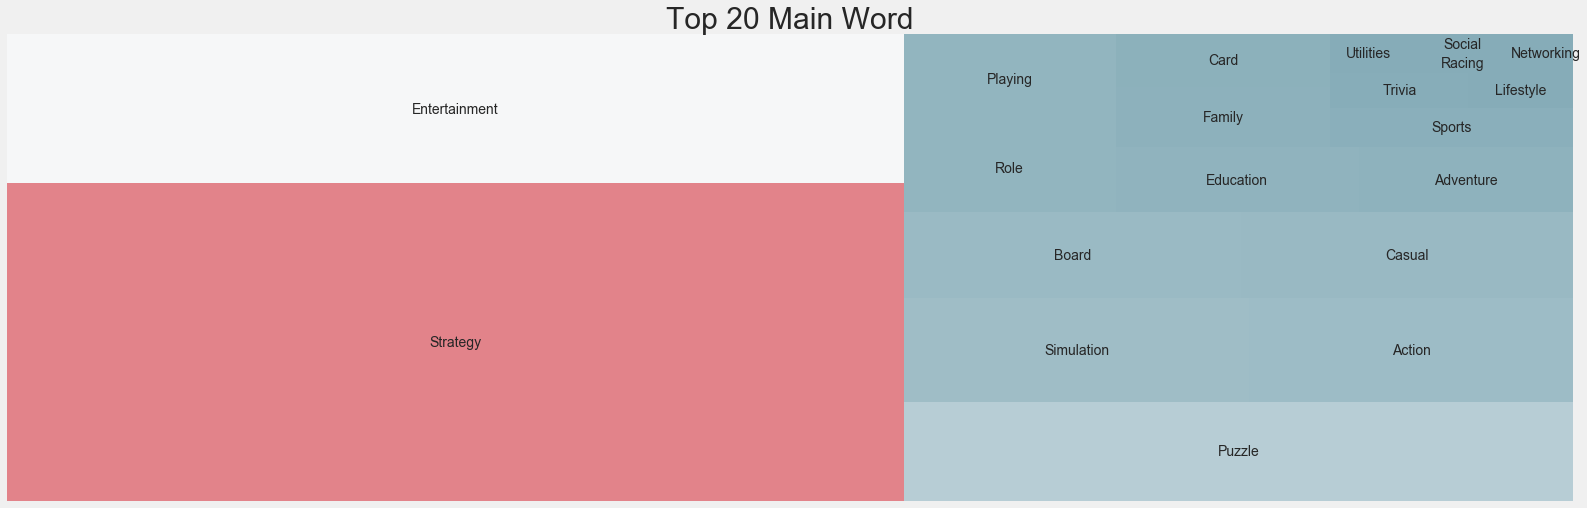

In [56]:
import squarify
y = res.apply(sum).sort_values(ascending=False)[:20]
    
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(25, 8)


norm = matplotlib.colors.Normalize(vmin=min(y), vmax=max(y))
#colors = [matplotlib.cm.Blues(norm(value)) for value in y]
colors = [cmap(norm(value)) for value in y]
colors[1] = "#FBFCFE"

squarify.plot(sizes = y.values, label = y.index, color = colors, alpha=.6)
plt.title('Top 20 Main Word', fontsize = 30)
plt.axis('off')
plt.show()

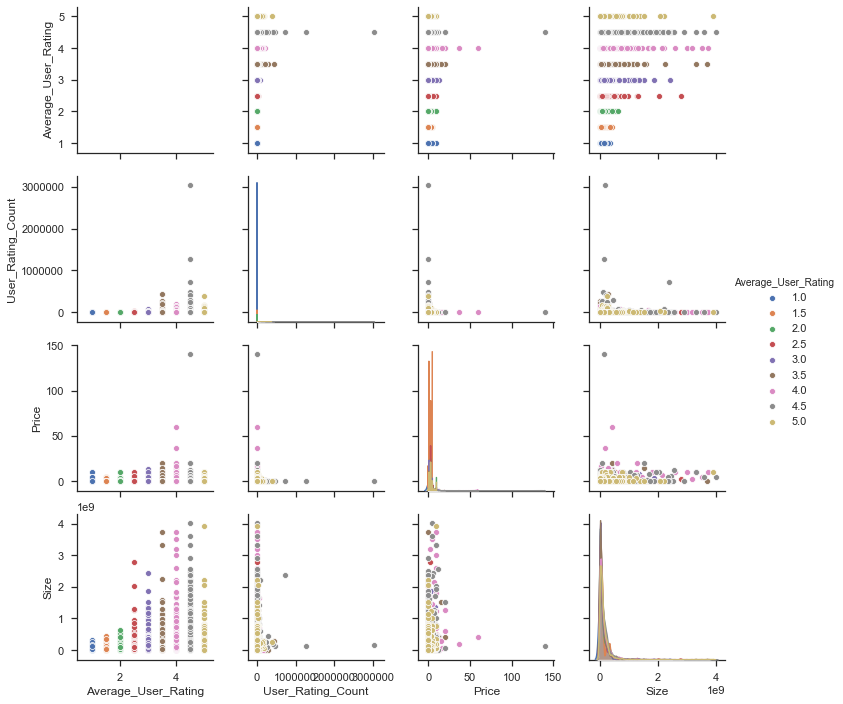

In [60]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(df, hue="Average_User_Rating")

In [66]:
from bokeh.plotting import figure, output_notebook
from bokeh.io import show
df['Original_Release_Date'] = pd.to_datetime(df['Original_Release_Date'], format = '%d/%m/%Y')
date_size = pd.DataFrame({'size':df['Size']})
date_size = date_size.set_index(df['Original_Release_Date'])
date_size = date_size.sort_values(by=['Original_Release_Date'])
date_size['size'] = date_size['size'].apply(lambda b : b//(2**10))
fig = figure(x_axis_type='datetime',           
             plot_height=250, plot_width=750,
             title='Date vs App Size')
fig.line(y='size', x='Original_Release_Date', source=date_size)
show(fig)

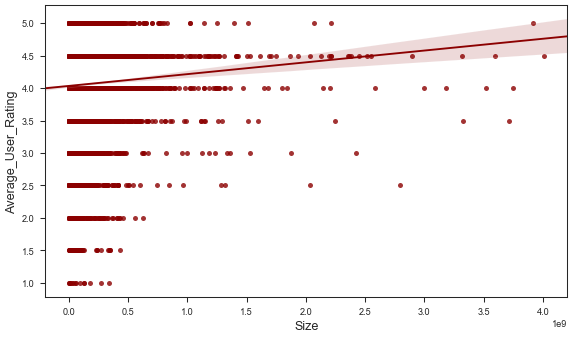

In [82]:
plt.figure(figsize=(10,6), dpi= 60)
ax = sns.regplot(data=df, x='Size', y='Average_User_Rating', color = 'darkred')
ax.set_ylabel('Average_User_Rating', fontsize = 15)
ax.set_xlabel('Size', fontsize = 15)
plt.show()

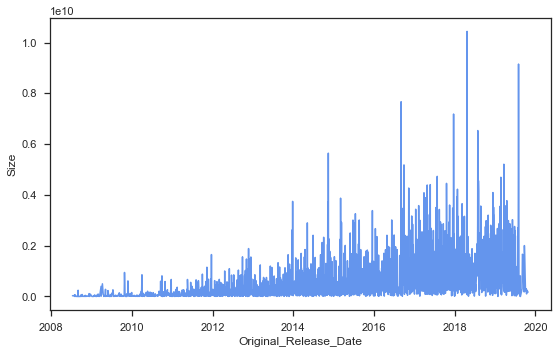

In [89]:
df["Original_Release_Date"] = pd.to_datetime(df["Original_Release_Date"])
df["year"] = df["Original_Release_Date"].dt.year

plt.rcParams['figure.figsize'] = (8,5)
temp_df = df.groupby(['Original_Release_Date']).Size.sum().reset_index()
ax = sns.lineplot(data = temp_df, x = 'Original_Release_Date', y = 'Size', color = 'cornflowerblue')
plt.xlabel('Original_Release_Date')
plt.ylabel('Size')
plt.show()